In [23]:
import numpy as np
import pandas as pd
from numpy import nan
import pickle
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 200)

## 1. load data

In [24]:
comprehensive = pd.read_stata('Comprehensive-Sample.dta')
aspo = pd.read_stata('ASPO-Sample.dta')

aspo0 = aspo[['year', 'numcode', 'd2incidenceU', 'd3_6incidenceU']]
comprehensive = pd.merge(comprehensive, aspo0, how="left", on=["year", "numcode"])

In [25]:
aspo.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 108 columns):
 #    Column                      Dtype  
---   ------                      -----  
 0    year                        float32
 1    numcode                     int16  
 2    oilreserves_full            float32
 3    oilreserves                 float32
 4    oilreserves_public          float32
 5    newdiscovery_aspo           float32
 6    imputedzero                 float32
 7    aspo                        float32
 8    wildcat                     float32
 9    endowment                   float32
 10   ecgrowth                    float32
 11   country                     object 
 12   incidence2COW               float64
 13   onset2COWCS                 float32
 14   incidenceU                  float32
 15   onsetUCS                    float32
 16   Fearon_war                  float64
 17   onset_FearonCS              float32
 18   Sambanis_war                float64
 19   onse

In [26]:
comprehensive.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17920 entries, 0 to 17919
Data columns (total 82 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        17920 non-null  float32
 1   numcode                     17920 non-null  int16  
 2   oilreserves_full            14307 non-null  float32
 3   oilreserves                 12519 non-null  float32
 4   oilreserves_public          9950 non-null   float32
 5   newdiscovery_aspo           12354 non-null  float32
 6   aspo                        4736 non-null   float32
 7   wildcat                     12354 non-null  float32
 8   endowment                   14160 non-null  float32
 9   pop_maddison                10441 non-null  float64
 10  ecgrowth                    9341 non-null   float32
 11  efrac                       390 non-null    float32
 12  lfrac                       390 non-null    float32
 13  rfrac                       390

In [27]:
comprehensive['code3'].unique()

array(['AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'ATG', 'AZE', 'ARG',
       'AUS', 'AUT', 'BHS', 'BHR', 'BGD', 'ARM', 'BRB', 'BEL', 'BMU',
       'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BLZ', 'SLB', 'VGB', 'BRN',
       'BGR', 'MMR', 'BDI', 'BLR', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM',
       'CAF', 'LKA', 'TCD', 'CHL', 'CHN', 'TWN', 'COL', 'COM', 'MYT',
       'COG', 'COD', 'COK', 'CRI', 'HRV', 'CUB', 'CYP', 'CZE', 'BEN',
       'DNK', 'DMA', 'DOM', 'ECU', 'SLV', 'GNQ', 'ETH', 'ERI', 'EST',
       'FRO', 'FLK', 'FJI', 'FIN', 'FXX', 'GUF', 'PYF', 'DJI', 'GAB',
       'GEO', 'GMB', 'DEU', 'GHA', 'GIB', 'KIR', 'GRC', 'GRL', 'GRD',
       'GLP', 'GUM', 'GTM', 'GIN', 'GUY', 'HTI', 'HND', 'HKG', 'HUN',
       'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'CIV',
       'JAM', 'JPN', 'KAZ', 'JOR', 'KEN', 'PRK', 'KOR', 'KWT', 'KGZ',
       'LAO', 'LBN', 'LSO', 'LVA', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX',
       'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MTQ', 'MRT',
       'MUS', 'MEX',

In [28]:
comprehensive = comprehensive.sort_values(['code3', 'year'], ascending=[True, True])

We see cyclic trend in GDP. So we will demean ecgrowth.

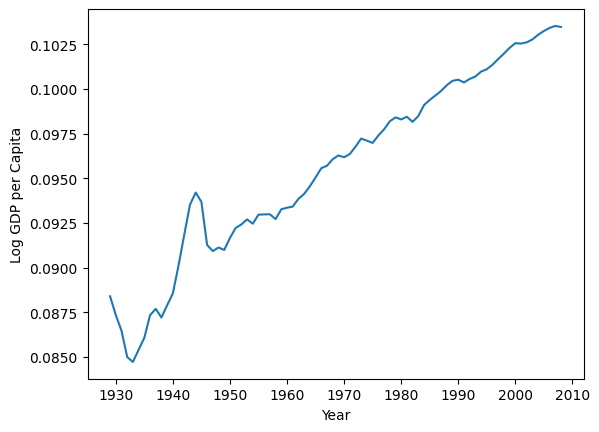

In [29]:
usa = comprehensive[comprehensive['code3'] == 'USA']

# create plot
plt.plot(usa['year'], usa['logGDP_M'])
plt.xlabel('Year')
plt.ylabel('Log GDP per Capita')
plt.show()

Need to take log and then diff:

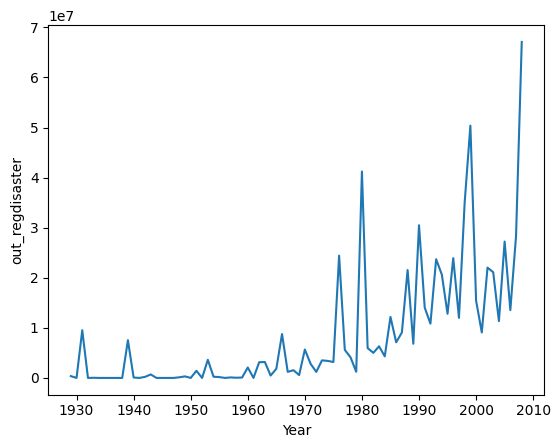

In [30]:
usa = comprehensive[comprehensive['code3'] == 'USA']

# create plot
plt.plot(usa['year'], usa['out_regdisaster'])
plt.xlabel('Year')
plt.ylabel('out_regdisaster')
plt.show()


Need to remove linear trend through first differencing:

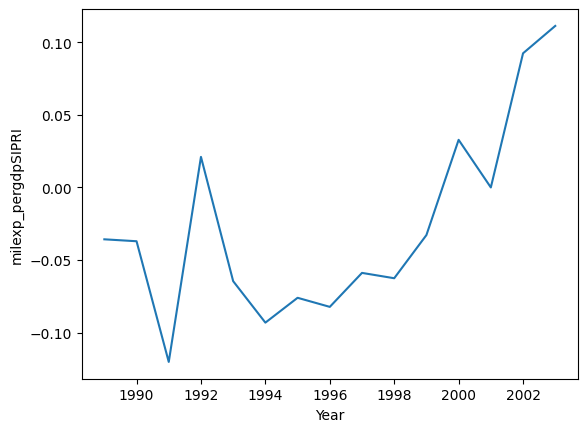

In [31]:
usa = comprehensive[comprehensive['code3'] == 'USA']

# create plot
plt.plot(usa['year'], (usa['logmilexgdpSIPRI']).diff())
plt.xlabel('Year')
plt.ylabel('milexp_pergdpSIPRI')
plt.show()


Need to remove linear trend through first differencing:

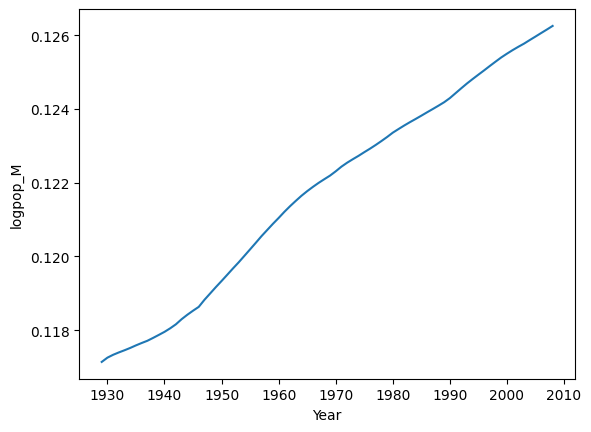

In [32]:
usa = comprehensive[comprehensive['code3'] == 'USA']

# create plot
plt.plot(usa['year'], (usa['logpop_M']))
plt.xlabel('Year')
plt.ylabel('logpop_M')
plt.show()


## 2. clean the data

In [33]:
v_lst = ['onset2COWCS',    # original
         'd2incidenceU',   # original
         'd3_6incidenceU', # original
         'onsetUCS',       # original 
         'coup',           # original
         'periregular',    # original
         'milexp_pergdpSIPRI', # diff
         
         'code3',          # original
         'year',           # original
         'decade',         # original
         'ecgrowth',       # demean 
         'logpop_M',       # diff
         'logpopdens',                 # diff
         'logoutreg',                  # diff
         'democracy',                  # original
         'logmountain',                # original
         'ethnic_fractionalization',   # original
         'religion_fractionalization', # original
         'language_fractionalization', # original
         'leg_british',                # original
         'opec',                       # original
         'oilreserves_full',           #recent_added
         'oilreserves'   ,             #recent_added
         'oilreserves_public']         #recent_added          

In [34]:
df = comprehensive[v_lst]

#### 2.1 test for stationarity

In [35]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load your time series data
df_copy = df.copy(deep=True)
df_copy.set_index(['code3', 'year'], inplace=True)

def adf_test_on_columns(group, columns, alpha=0.05, min_rows=10):
    results = {}
    for col in columns:
        # Drop missing values for the current column
        col_data = group[col].dropna()

        # Check for zero variance
        if col_data.var() == 0:
            results[col] = {'P-value': 0, 'Stationary': True}
        # Perform ADF test only if there are at least min_rows rows
        elif len(col_data) >= min_rows:
            adf_result = sm.tsa.stattools.adfuller(col_data)
            p_value = adf_result[1]
            results[col] = {'P-value': p_value, 'Stationary': p_value < alpha}
        else:
            results[col] = None
    return results

columns_to_test = ['democracy',                  # original
         'logmountain',                # original
         'ethnic_fractionalization',   # original
         'religion_fractionalization', # original
         'language_fractionalization', # original
         'leg_british',                # original
         'opec']
all_results = {}

for country, group in df_copy.groupby(level=0):
    results = adf_test_on_columns(group, columns_to_test)
    all_results[country] = results

# Count the stationary and non-stationary results for each variable
stationary_counts = {col: 0 for col in columns_to_test}
non_stationary_counts = {col: 0 for col in columns_to_test}
tested_countries_counts = {col: 0 for col in columns_to_test}

for country, results in all_results.items():
    for col, result in results.items():
        if result is not None:
            tested_countries_counts[col] += 1
            if result['Stationary']:
                stationary_counts[col] += 1
            else:
                non_stationary_counts[col] += 1

# Calculate proportions
stationary_proportions = {col: count / tested_countries_counts[col] for col, count in stationary_counts.items()}
non_stationary_proportions = {col: count / tested_countries_counts[col] for col, count in non_stationary_counts.items()}

# Print the proportions
for col in columns_to_test:
    print(f"Proportions for {col}:")
    print(f"  Stationary: {stationary_proportions[col]}")
    print(f"  Non-stationary: {non_stationary_proportions[col]}")


C:\Users\Janet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:956: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\Janet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:956: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\Janet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:956: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Proportions for democracy:
  Stationary: 0.2777777777777778
  Non-stationary: 0.7222222222222222
Proportions for logmountain:
  Stationary: 1.0
  Non-stationary: 0.0
Proportions for ethnic_fractionalization:
  Stationary: 1.0
  Non-stationary: 0.0
Proportions for religion_fractionalization:
  Stationary: 1.0
  Non-stationary: 0.0
Proportions for language_fractionalization:
  Stationary: 1.0
  Non-stationary: 0.0
Proportions for leg_british:
  Stationary: 1.0
  Non-stationary: 0.0
Proportions for opec:
  Stationary: 0.9419642857142857
  Non-stationary: 0.05803571428571429


C:\Users\Janet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:956: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\Janet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:956: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


#### 2.2 cleaning

In [36]:
df.loc[:, 'milexp_pergdpSIPRI_diff'] = df.groupby('code3')['milexp_pergdpSIPRI'].diff()
df.loc[:, 'logpop_M_diff'] = df.groupby('code3')['logpop_M'].diff()
df.loc[:, 'logpopdens_diff'] = df.groupby('code3')['logpopdens'].diff()
df.loc[:, 'logoutreg_diff'] = df.groupby('code3')['logoutreg'].diff()

C:\Users\Janet\AppData\Local\Temp\ipykernel_16324\547077148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'milexp_pergdpSIPRI_diff'] = df.groupby('code3')['milexp_pergdpSIPRI'].diff()
C:\Users\Janet\AppData\Local\Temp\ipykernel_16324\547077148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'logpop_M_diff'] = df.groupby('code3')['logpop_M'].diff()
C:\Users\Janet\AppData\Local\Temp\ipykernel_16324\547077148.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [37]:
# demean ecgrowth
group_means = df.groupby('code3')['ecgrowth'].transform('mean')
df['ecgrowth_demeaned'] = df['ecgrowth'] - group_means

C:\Users\Janet\AppData\Local\Temp\ipykernel_16324\185721332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ecgrowth_demeaned'] = df['ecgrowth'] - group_means


In [38]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 17920 entries, 11200 to 15039
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   onset2COWCS                 14912 non-null  float32
 1   d2incidenceU                3490 non-null   float32
 2   d3_6incidenceU              3234 non-null   float32
 3   onsetUCS                    11848 non-null  float32
 4   coup                        12855 non-null  float64
 5   periregular                 5758 non-null   float32
 6   milexp_pergdpSIPRI          2194 non-null   float32
 7   code3                       17920 non-null  object 
 8   year                        17920 non-null  float32
 9   decade                      17696 non-null  float32
 10  ecgrowth                    9341 non-null   float32
 11  logpop_M                    10441 non-null  float32
 12  logpopdens                  10441 non-null  float32
 13  logoutreg                   1784

In [39]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# non_null_counts = df.groupby(['code3', 'year']).count()
# for variable in v_lst:
#     plt.figure(figsize=(10, 8))
   
#     heatmap_data = non_null_counts.reset_index().pivot(index='year', columns='code3', values=variable)
#     sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt="d")
#     plt.title(f'Non-null counts of {variable} by Year and Country')
#     plt.show()


In [40]:
df.to_csv('stability_df.csv')